In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/MLproject

Mounted at /content/gdrive/
/content/gdrive/MyDrive/MLproject


In [2]:
pip install fastai

In [3]:
import csv
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from fastai.tabular import add_datepart
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score


--------
1. BHARTIARTL.csv
2. CIPLA.csv
3. DRREDDY's.csv
Input no of CSV file to get prediction: 3

---------------------------------------------
data of :  DRREDDY.csv
        Prev Close         Open  ...  Deliverable Volume  %Deliverble
count  5306.000000  5306.000000  ...        4.797000e+03  4797.000000
mean   1827.672814  1830.099821  ...        2.174943e+05     0.523664
std    1092.984492  1095.534718  ...        1.871552e+05     0.165854
min     374.000000   365.650000  ...        7.070000e+02     0.036800
25%     906.175000   908.175000  ...        9.731900e+04     0.411500
50%    1538.825000  1539.500000  ...        1.692400e+05     0.539100
75%    2609.337500  2612.000000  ...        2.769510e+05     0.644200
max    5416.800000  5440.950000  ...        2.065429e+06     1.000000

[8 rows x 12 columns]
No Missing values in the Close price coloumn


<Figure size 1440x576 with 0 Axes>

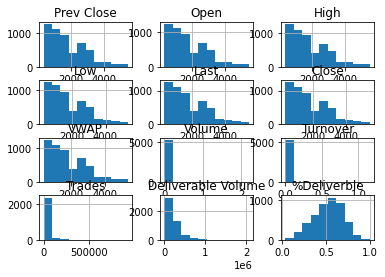

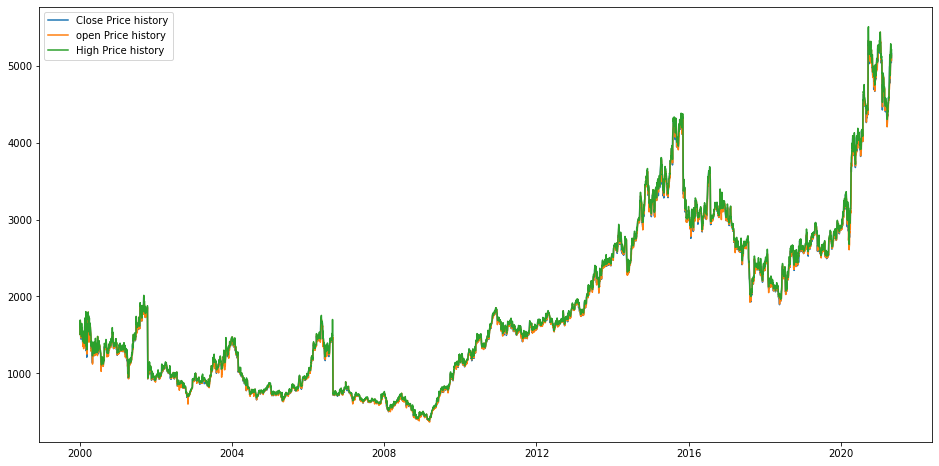

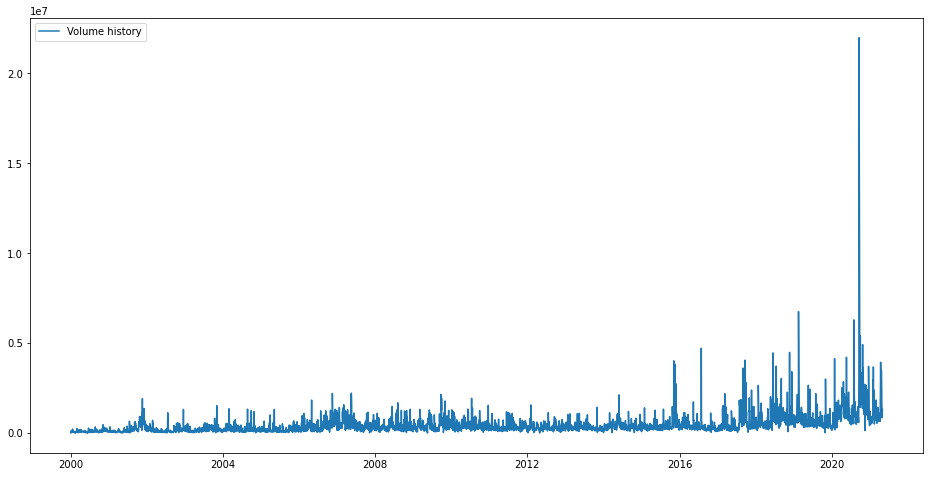

<Figure size 1152x648 with 0 Axes>

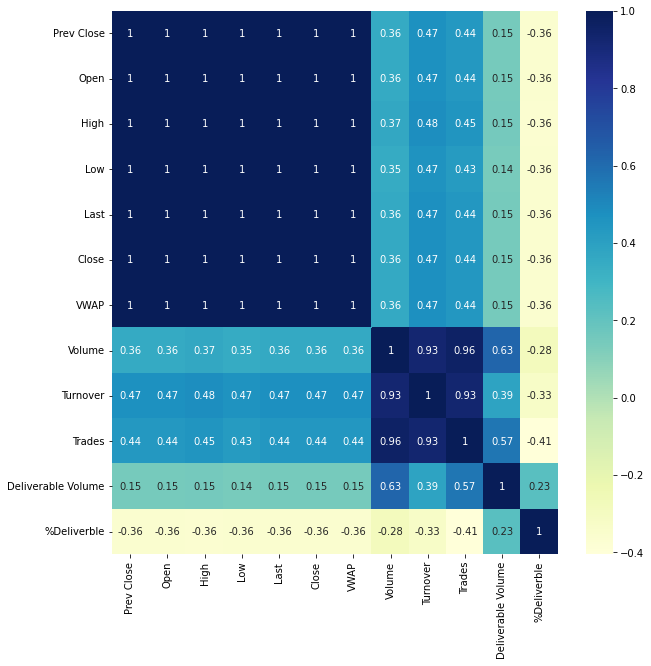

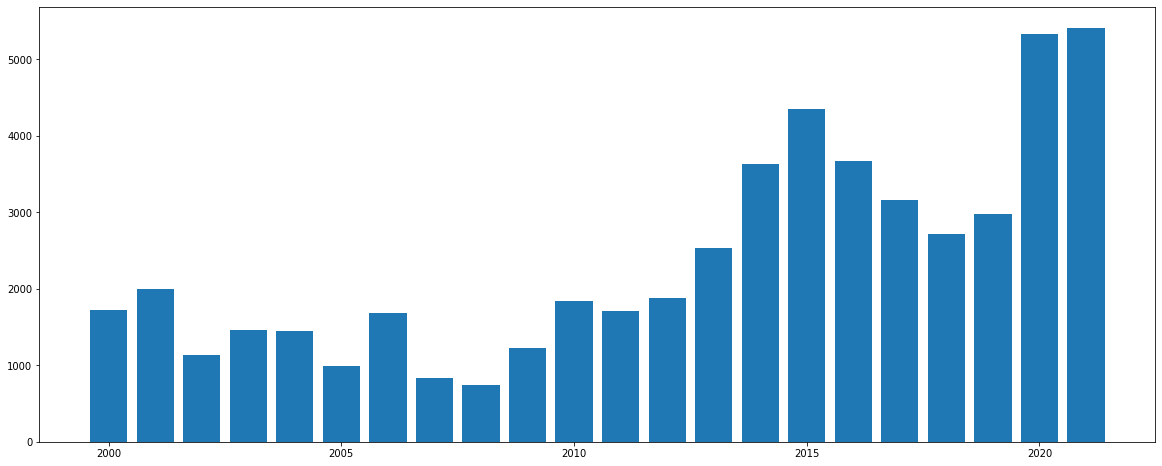

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


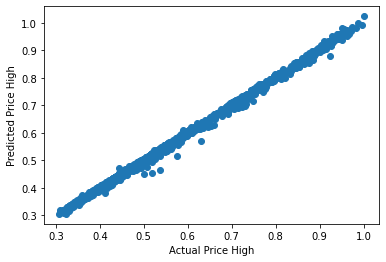

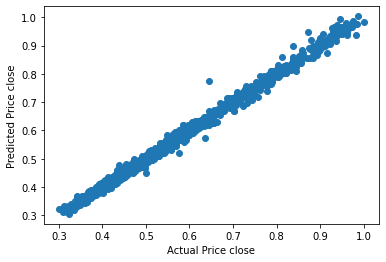

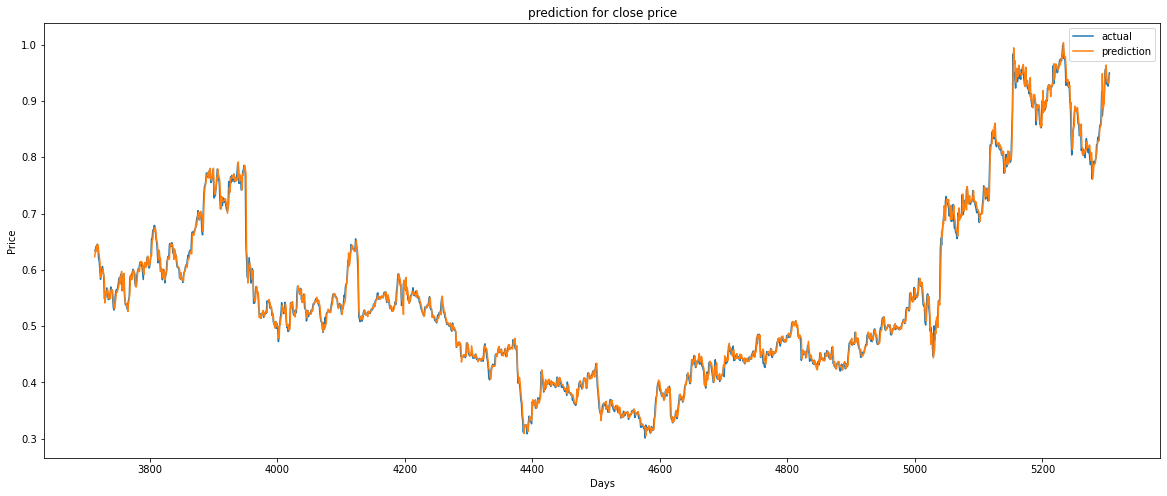

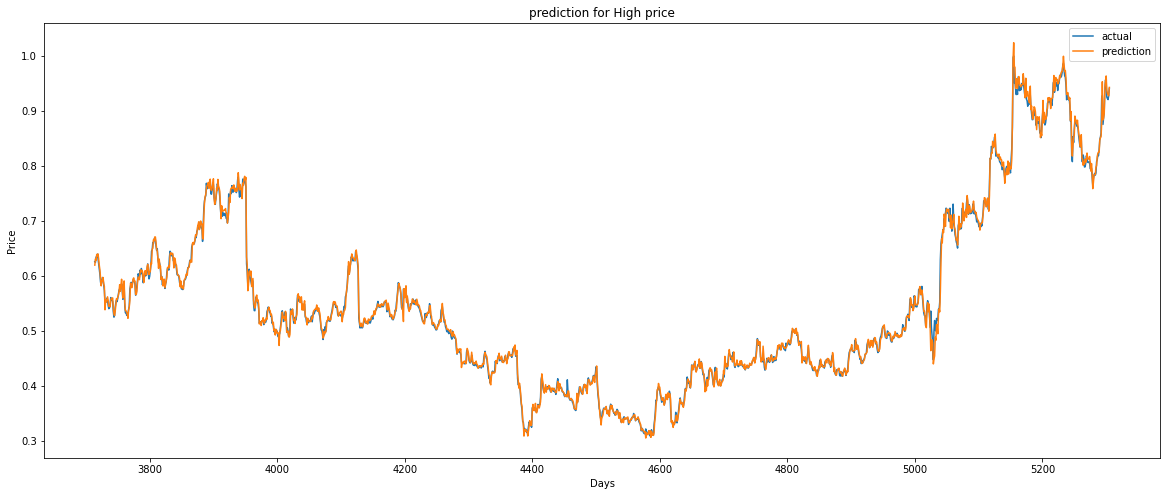

R^2:  0.9964125792628864
Mean Absolute Error: 0.0063620744960604676
Coefficient of Determination: 0.9964125792628864
MSE:  9.138576390441739e-05
RMSE:  0.009559590153579671


In [8]:
def alggo(data):
  print("\n---------------------------------------------\ndata of : ",data)
  #check close values is False
  df=pd.read_csv(data)
  df = pd.DataFrame(df)
  print(df.describe())
  if (df['Close'].isna().sum())!=1 and (df['High'].isna().sum())!=1:
    print("No Missing values in the Close price coloumn")
  
  #changing Date formate
  df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d') 
  df.index = df['Date']

  #sorting
  data = df.sort_index(ascending=True, axis=0)
  
  #creating a separate dataset
  new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open','High','Volume'])
  new_data['Date'] = df['Date'].values
  new_data['Close'] = df['Close'].values
  new_data['Open'] = df['Open'].values
  new_data['High'] = df['High'].values
  new_data['Volume'] = df['Volume'].values

  #Visualization
  #histogram
  fig = plt.figure(figsize =(20,8))
  df.hist()
  fig.show()

  #data Close, High, Open
  plt.figure(figsize=(16,8))
  plt.plot(df['Date'],df['Close'], label='Close Price history')
  plt.plot(df['Date'],df['Open'], label='open Price history')
  plt.plot(df['Date'],df['High'], label='High Price history')
  plt.legend()
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(df['Date'],df['Volume'], label='Volume history')
  plt.legend()
  plt.show()

  #subplots
  plt.figure(figsize=(16,9))
  fig, ax = plt.subplots(figsize=(10,10))  
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

  # Horizontal Bar Plot
  df1 = df
  df1.index=df1['Date']
  df1['year'] = df1.index.year
  fig = plt.figure(figsize =(20,8))
  plt.bar(df1['year'],df1['Close'])
  plt.show()

  from fastai.tabular import add_datepart
  add_datepart(new_data, 'Date')
  new_data.drop('Elapsed', axis=1, inplace=True)


  #standatization
  scaler = MinMaxScaler(feature_range=(0, 1))
  scal = scaler.fit_transform(new_data)
  
  new_data = pd.DataFrame(scal,index=range(0,len(df)),columns=new_data.columns)

  n = len(new_data)
  sev = int(0.70 * n)
  train = new_data[:sev]
  test = new_data[sev:]

  pred = ['Close','High']
  x_train = train.drop(pred, axis=1)
  y_train = train[pred]
  x_test = test.drop(pred, axis=1)
  y_test = test[pred]


  #implement linear regression
  model = LinearRegression()
  model.fit(x_train,y_train)

  #prediction
  preds = model.predict(x_test)

  #vizulization predictions Vs actual

  test['Predictions close'] = [x[0] for x in preds]
  test['Predictions high'] = [x[1] for x in preds]


  x = np.array(y_test['High'])
  y = np.array(test['Predictions high'])
  plt.scatter(y_test['High'],len(test))
  plt.xlabel("Actual Price High")
  plt.ylabel("Predicted Price High")
  plt.show()

  x = np.array(y_test['Close'])
  y = np.array(test['Predictions close'])
  plt.scatter(x, y)
  plt.xlabel("Actual Price close")
  plt.ylabel("Predicted Price close")
  plt.show()

  fig = plt.figure(figsize =(20,8))
  plt.plot(test['Close'],label = 'actual')
  plt.plot(test['Predictions close'],label = 'prediction')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('prediction for close price')
  plt.legend()
  plt.show()

  fig = plt.figure(figsize =(20,8))
  plt.plot(test['High'], label = 'actual')
  plt.plot(test['Predictions high'], label = 'prediction')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('prediction for High price')
  plt.legend()
  plt.show()

  print('R^2: ',model.score(x_test,y_test))
  print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
  print("Coefficient of Determination:", r2_score(y_test, preds))
  print("MSE: ",mean_squared_error(y_test, preds))
  print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds)))


if __name__ == '__main__':
  filename=['BHARTIARTL.csv','CIPLA.csv','DRREDDY.csv']
  n = int(input("--------\n1. BHARTIARTL.csv\n2. CIPLA.csv\n3. DRREDDY's.csv\nInput no of CSV file to get prediction: "))
  alggo(filename[n-1])